In [1]:
%reload_kedro
metadata = catalog.load("mars_dataset_meta")
metadata

2023-03-03 12:47:24,041 - kedro.ipython - INFO - Resolved project path as: /home/daniel/git/self-supervised-learning.
To set a different path, run '%reload_kedro <project_root>'
2023-03-03 12:47:24,042 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/kedro/framework/startup.py:98: DeprecationWarning: project_version in pyproject.toml is deprecated, use kedro_init_version instead
  warnings.warn(

2023-03-03 12:47:24,177 - kedro.ipython - INFO - Kedro project Self-Supervised Learning
2023-03-03 12:47:24,177 - kedro.ipython - INFO - Defined global variable 'context', 'session', 'catalog' and 'pipelines'
2023-03-03 12:47:24,182 - kedro.io.data_catalog - INFO - Loading data from 'mars_dataset_meta' (FeatherDataSet)...


,clip,frame_num,camera,timestamp,file_id
0,0,165,0,5.504260,clip0_cam0_frame165
1,0,165,1,5.504260,clip0_cam1_frame165
2,0,165,2,5.504260,clip0_cam2_frame165
3,1,735,0,30.356829,clip1_cam0_frame735
4,1,735,1,30.356829,clip1_cam1_frame735
...,...,...,...,...,...
696391,1781,14,1,3382.985641,clip1781_cam1_frame14
696392,1781,14,2,3382.985641,clip1781_cam2_frame14
696393,1781,20,0,3383.285537,clip1781_cam0_frame20
696394,1781,20,1,3383.285537,clip1781_cam1_frame20


2023-03-03 12:47:28,256 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-03-03 12:47:28,256 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)

2023-03-03 12:47:28,265 - py.warnings - WARNING - /home/daniel/git/self-supervised-learning/.venv/lib/python3.9/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)

2023-03-03 12:47:28,265 - py.warnings - WARNING - /ho

,timestamp
clip,
7,0.335227
11,0.770926
16,11.650341
18,13.966041
20,20.323280
...,...
1777,0.466500
1778,2.732352
1779,0.566449


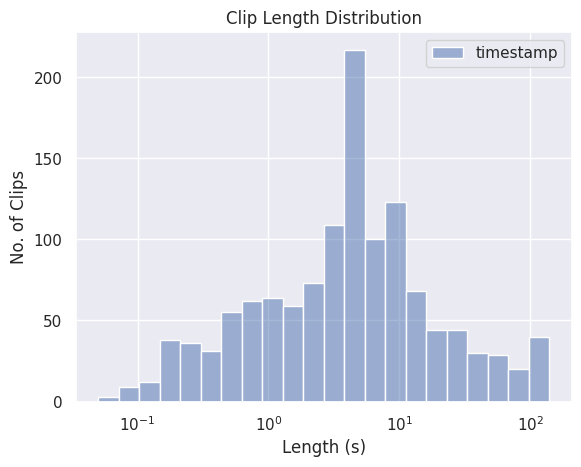

In [2]:
import seaborn as sns

sns.set_theme()

# Compute clip lengths for a single camera.
camera0 = metadata[metadata["camera"] == 0]
by_clip = camera0[["clip", "timestamp"]].groupby("clip")
clip_lengths = by_clip.max() - by_clip.min()
# Filter zero-length clips, since those are useless.
clip_lengths = clip_lengths[clip_lengths > 0]
clip_lengths.dropna(inplace=True)

plot = sns.histplot(data=clip_lengths, log_scale=True)
plot.set(title="Clip Length Distribution", xlabel="Length (s)", ylabel="No. of Clips")
clip_lengths

In [3]:
long_clips = clip_lengths[clip_lengths > 50]
long_metadata = metadata[metadata["clip"].isin(long_clips.index)]
long_metadata

,clip,frame_num,camera,timestamp,file_id
18,7,46,0,2.145455,clip7_cam0_frame46
19,7,46,1,2.145455,clip7_cam1_frame46
20,7,46,2,2.145455,clip7_cam2_frame46
21,7,48,0,2.212500,clip7_cam0_frame48
22,7,48,1,2.212500,clip7_cam1_frame48
...,...,...,...,...,...
696391,1781,14,1,3382.985641,clip1781_cam1_frame14
696392,1781,14,2,3382.985641,clip1781_cam2_frame14
696393,1781,20,0,3383.285537,clip1781_cam0_frame20
696394,1781,20,1,3383.285537,clip1781_cam1_frame20


2023-03-03 12:48:39.209 | DEBUG    | self_supervised.pipelines.frame_selector:__filter_short_clips:81 - Have 1734 clips of sufficient length.


232132
['clip885_cam0_frame691', 'clip885_cam1_frame691', 'clip885_cam2_frame691']


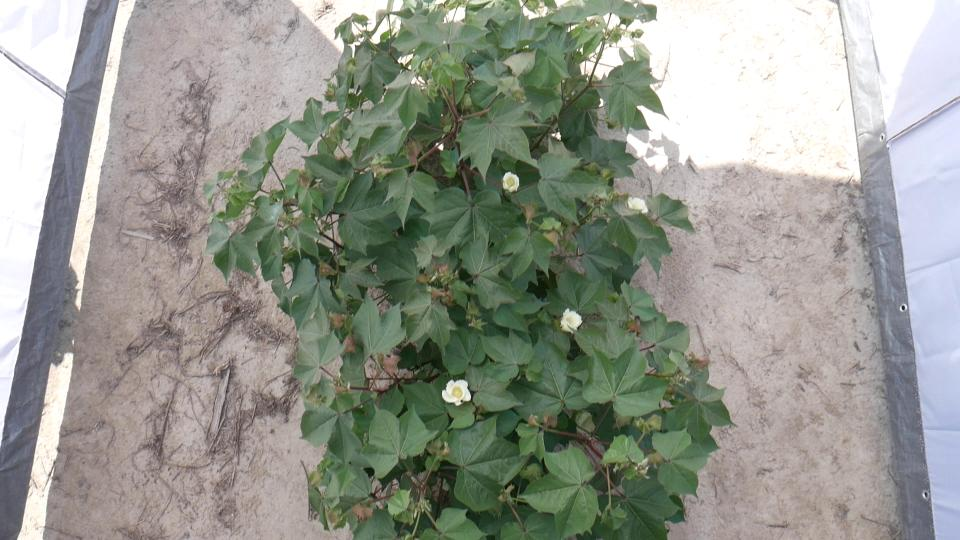

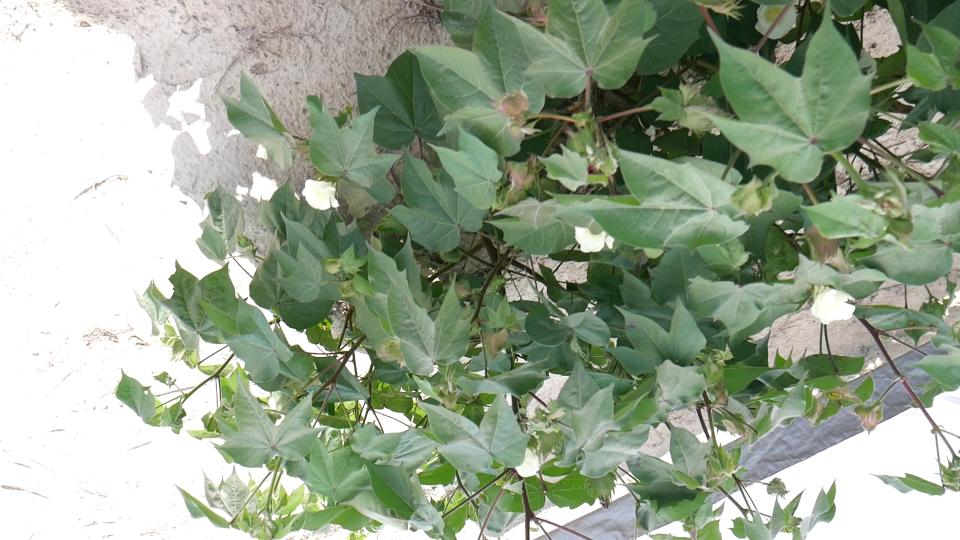

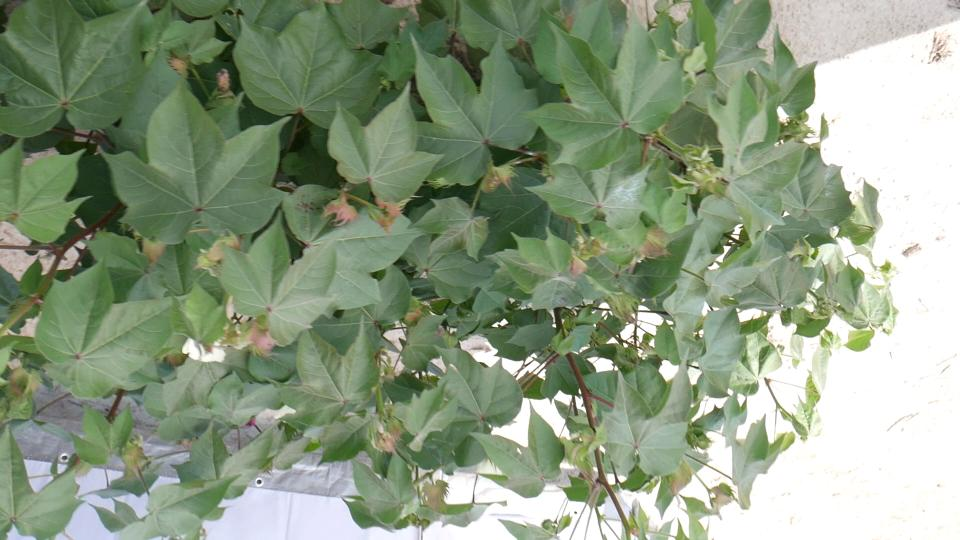

In [10]:
from self_supervised.pipelines.frame_selector import FrameSelector
from pathlib import Path
from PIL import Image

selector = FrameSelector(metadata, positive_time_range=(0.0, 0.0), negative_time_range=(0.0, 0.0))
print(selector.num_frames)
example_ids = selector.get_all_views(120000)
print(example_ids)

frame_path = Path("data/05_model_input/mars_multi_camera")
example_paths = [frame_path / f"{e}.jpg" for e in example_ids]
example_images = [Image.open(p) for p in example_paths]
for image in example_images:
    display(image)